# Stock Price Data Analysis

# Question 1

Using Python, load the provided dataset and preprocess it.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

data = pd.read_csv('2. Stock Prices Data - 2. Stock Prices Data.csv') 
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-03,36883.64844,37140.00000,36563.19922,36761.14844,36760.72266,155600.0
1,2021-09-06,36878.25000,36923.64844,36554.44922,36592.35156,36591.92578,88600.0
2,2021-09-07,36558.85156,36685.85156,36151.94922,36468.80078,36468.37500,124500.0
3,2021-09-08,36519.69922,36855.89844,36393.60156,36768.19922,36767.77344,175800.0
4,2021-09-09,36725.50000,36857.19922,36566.69922,36683.19922,36682.77344,83600.0
...,...,...,...,...,...,...,...
491,2023-08-28,44253.64844,44610.39844,44201.44922,44494.64844,44494.64844,163000.0
492,2023-08-29,44655.75000,44673.00000,44429.80078,44495.25000,44495.25000,140300.0
493,2023-08-30,44706.55078,44779.64844,44149.80078,44232.60156,44232.60156,153100.0
494,2023-08-31,44265.85156,44399.64844,43895.05078,43989.14844,43989.14844,705100.0


In [2]:
data.shape

(496, 7)

In [3]:
data.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [4]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [5]:
# the date column data type is object I change into the date format.
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)
data.reset_index(drop=True, inplace=True)

In [6]:
data.fillna(method='bfill', inplace=True)

In [7]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


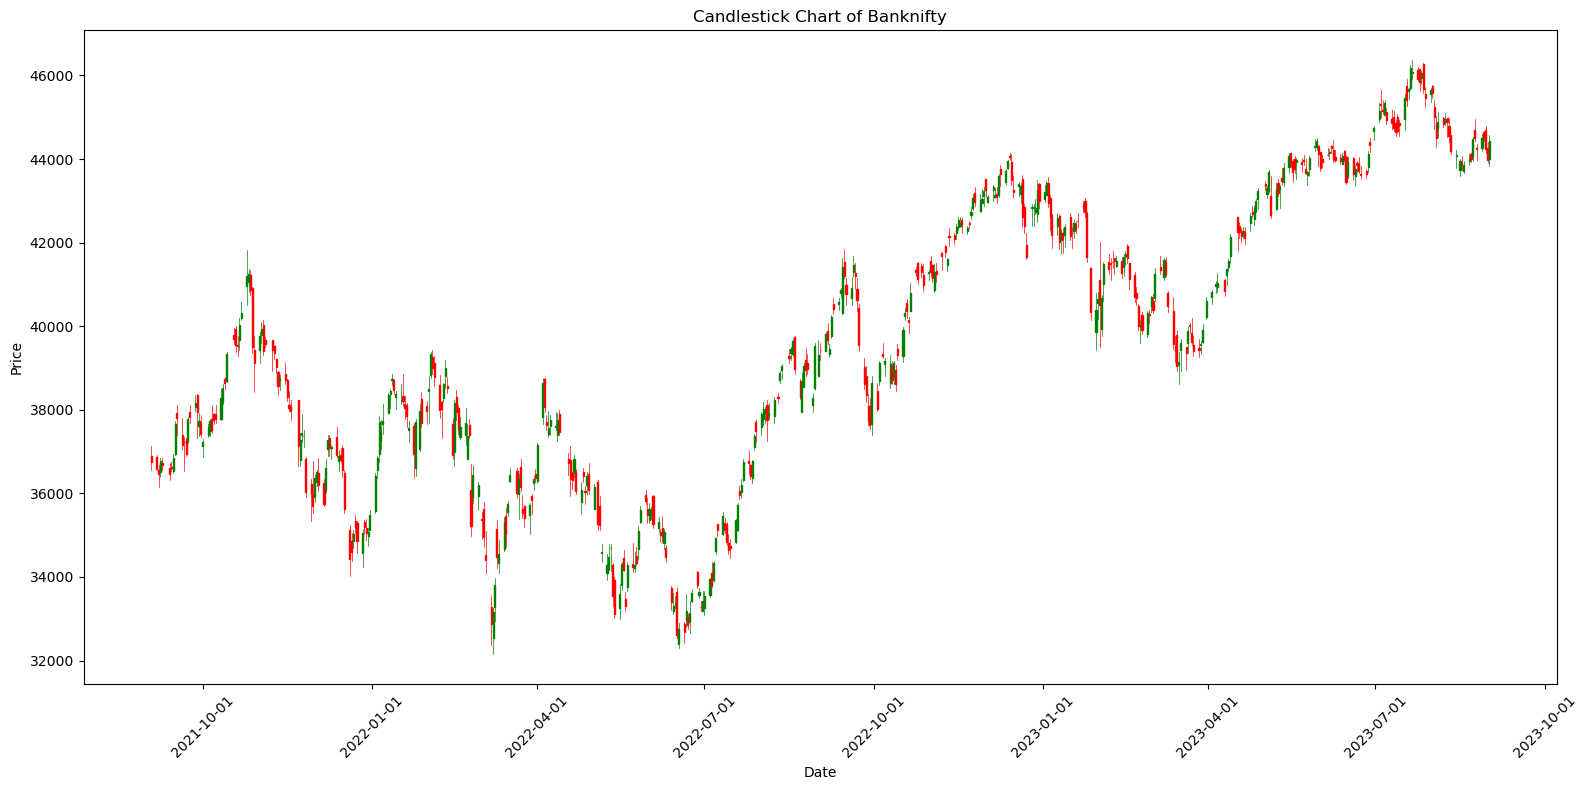

In [8]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

ohlc = data[['Date', 'Open', 'High', 'Low', 'Close']].copy()
ohlc['Date'] = mdates.date2num(ohlc['Date'])  

fig, ax = plt.subplots(figsize=(16, 8)) 

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='g', colordown='r')

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Candlestick Chart of Banknifty')

plt.tight_layout()
plt.show()

Create a training set and a testing set by splitting the data. Use 80% of the data for training and the remaining 20% for testing.

In [9]:
#I split the training and testing dataset. this is time series data so i can't split it randomly.
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

split_percentage = 0.8
split_index = int(split_percentage * len(data))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

Implement a linear regression model to predict the closing price for the next three days based on the opening price, highest price, lowest price, and trading volume. Train the model using the training set.

In [22]:
# I apply linerae regression model and print the predicted_close price of the testing dataset.
model = LinearRegression()
model.fit(X_train, y_train)

predicted_closing_prices = model.predict(X_test)

predicted_values_df = pd.DataFrame({'Date': data['Date'][split_index:], 'Predicted_Close': predicted_closing_prices})
print(predicted_values_df)

          Date  Predicted_Close
396 2023-04-11     41197.051363
397 2023-04-12     41520.617454
398 2023-04-13     41987.612066
399 2023-04-17     41976.900721
400 2023-04-18     42268.574544
..         ...              ...
491 2023-08-28     44532.709027
492 2023-08-29     44511.018516
493 2023-08-30     44344.076928
494 2023-08-31     44102.378322
495 2023-09-01     44365.458324

[100 rows x 2 columns]


In [23]:
actual_closing_prices = np.array([44578.3, 44532.1, 44409.1])

future_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.DateOffset(days=1), periods=3, freq='B')

future_features = pd.DataFrame({
    'Open': [44647.65, 44625.05, 44494.65],
    'High': [44656.05, 44668.70, 44577.00],
    'Low': [44310.95, 44401.70, 44207.25],
    'Volume': [238630, 225500, 252040]
}, index=future_dates)

# Fit the model and predict the closing prices
model.fit(data[['Open', 'High', 'Low', 'Volume']], data['Close'])
future_closing_prices = model.predict(future_features)

# Create a DataFrame with both predicted and actual closing prices
predicted_future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_closing_prices, 'Actual_Close': actual_closing_prices})

# Print the DataFrame
print(predicted_future_df)

        Date  Predicted_Close  Actual_Close
0 2023-09-04     44403.798130       44578.3
1 2023-09-05     44501.075114       44532.1
2 2023-09-06     44351.664662       44409.1


Calculate the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) to evaluate the model's performance on the testing set.

In [24]:
# The mean squared error are shows the average squared difference betwen predicted and actual value.
# Root mean squared error it is modified version of MSE. it calculate by taking square root of MAE.
# Our MAE is 89 and RMSE is 116 so performance of model is above average.
mae = mean_absolute_error(y_test, predicted_closing_prices)
rmse = np.sqrt(mean_squared_error(y_test, predicted_closing_prices))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 89.15
RMSE: 116.33


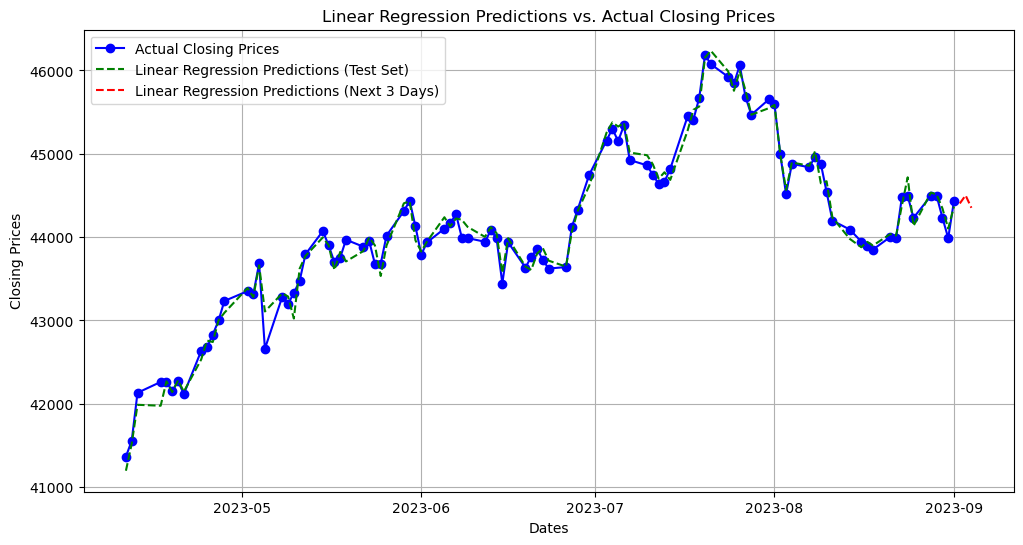

In [13]:
# I plot the actual and predicted closing price also i add the next three day predicted line in red color.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Date'][split_index:], y_test, label='Actual Closing Prices', marker='o', color='b')

plt.plot(data['Date'][split_index:], predicted_closing_prices, label='Linear Regression Predictions (Test Set)', linestyle='--', color='g')

future_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.DateOffset(days=1), periods=3, freq='D')
plt.plot(future_dates, future_closing_prices, label='Linear Regression Predictions (Next 3 Days)', linestyle='--', color='r')

plt.title('Linear Regression Predictions vs. Actual Closing Prices')
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.legend()
plt.grid(True)
plt.show()

# Question 2

Extend the previous scenario by using a different machine learning algorithm of your choice (e.g., Decision Tree, Random Forest, or Support Vector Machine) to predict the closing price for the next three days.

In [14]:
# I am using a decision tree ml model.
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor(random_state=42)  
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [15]:
decision_tree_predicted_closing_prices = decision_tree_model.predict(X_test)

predicted_values_df = pd.DataFrame({'Date': data['Date'][split_index:], 'Predicted_Close': predicted_closing_prices})
print(predicted_values_df)

          Date  Predicted_Close
396 2023-04-11     41197.640711
397 2023-04-12     41521.328274
398 2023-04-13     41988.401633
399 2023-04-17     41977.276502
400 2023-04-18     42269.262087
..         ...              ...
491 2023-08-28     44533.861901
492 2023-08-29     44512.017308
493 2023-08-30     44344.899430
494 2023-08-31     44103.248655
495 2023-09-01     44366.567645

[100 rows x 2 columns]


In [16]:
# The performance of the model is not good. 
future_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.DateOffset(days=1), periods=3, freq='B')

future_features = pd.DataFrame({
    'Open': [44647.65, 44625.05, 44494.65],
    'High': [44656.05, 44668.70, 44577.00],
    'Low': [44310.95, 44401.70, 44207.25],
    'Volume': [238630, 225500, 252040]
}, index=future_dates)

future_closing_prices = decision_tree_model.predict(future_features)

predicted_future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_closing_prices})

print(predicted_future_df)

        Date  Predicted_Close
0 2023-09-04      43946.55078
1 2023-09-05      43946.55078
2 2023-09-06      43946.55078


# Comparision

In [17]:
# I compare the MAE and RMSE value of linear regression and decision tree.
# The linear regression are give better result compare to the decision tree.
# The linear regression based of simlicity, interpretability and decision tree are based of the through understanding of the data.that's why linear regression model performance is better.
decision_tree_mae = mean_absolute_error(y_test, decision_tree_predicted_closing_prices)
decision_tree_rmse = np.sqrt(mean_squared_error(y_test, decision_tree_predicted_closing_prices))

print(f'Decision Tree MAE: {decision_tree_mae:.2f}')
print(f'Decision Tree RMSE: {decision_tree_rmse:.2f}')

Decision Tree MAE: 508.32
Decision Tree RMSE: 770.00


In [18]:
print(f'Linear Regression MAE: {mae:.2f}')
print(f'Linear Regression RMSE: {rmse:.2f}')

Linear Regression MAE: 89.28
Linear Regression RMSE: 116.40


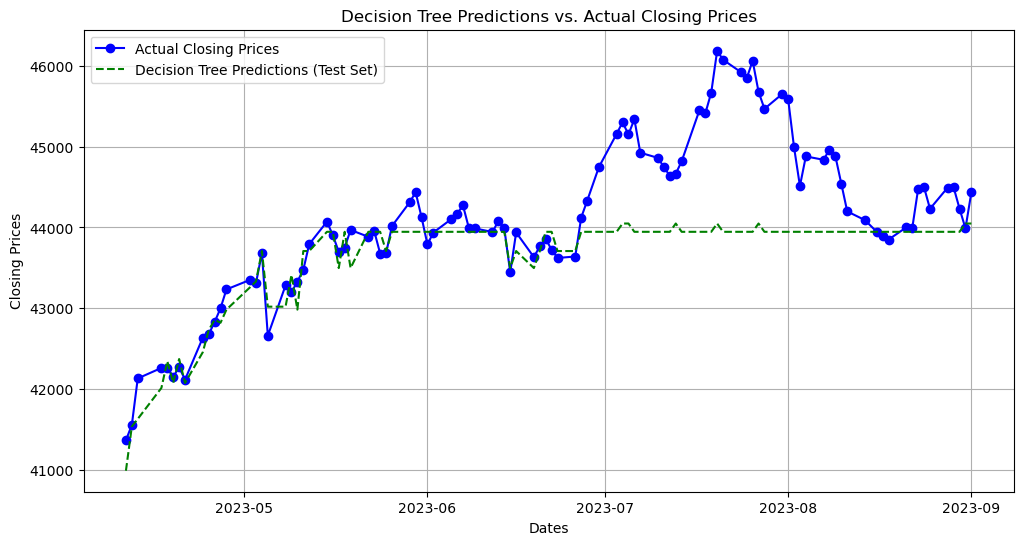

In [19]:
# I plot the decision tree actual and predicted close value.the performance of the model is very poor.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Date'][split_index:], y_test, label='Actual Closing Prices', marker='o', color='b')

plt.plot(data['Date'][split_index:], decision_tree_predicted_closing_prices, label='Decision Tree Predictions (Test Set)', linestyle='--', color='g')

plt.title('Decision Tree Predictions vs. Actual Closing Prices')
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.legend()
plt.grid(True)
plt.show()

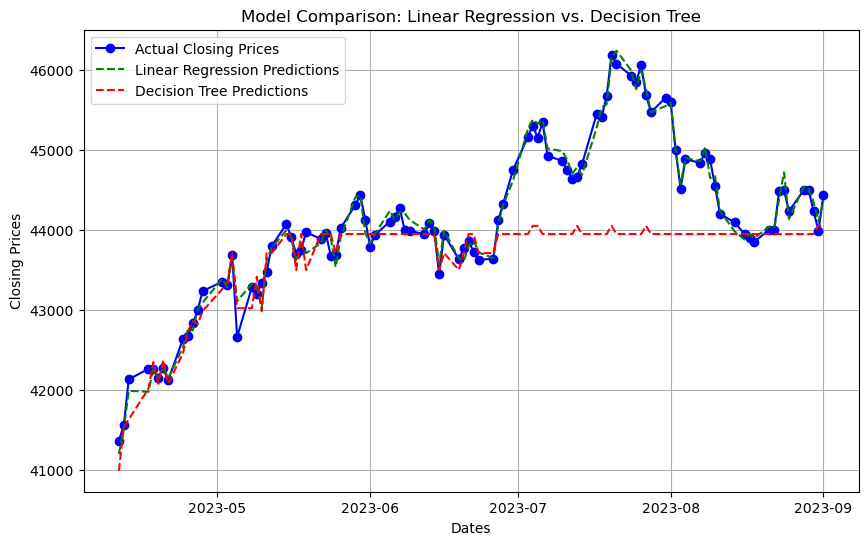

In [20]:
#The below chart shows the comparision of actual closing price with the linear regression and decision tree closing price.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Model Comparison: Linear Regression vs. Decision Tree')
plt.xlabel('Dates')
plt.ylabel('Closing Prices')

plt.plot(data['Date'][split_index:], y_test, label='Actual Closing Prices', marker='o', color='b')

plt.plot(data['Date'][split_index:], predicted_closing_prices, label='Linear Regression Predictions', linestyle='--', color='g')

plt.plot(data['Date'][split_index:], decision_tree_predicted_closing_prices, label='Decision Tree Predictions', linestyle='--', color='r')

plt.legend()
plt.grid(True)
plt.show()